<a href="https://colab.research.google.com/github/makena-yvonne/Countdown/blob/master/Pandas_DdataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pandas - DataFrames**

Probably the most important data structure of pandas is the DataFrame. It's a tabular structure tightly integrated with Series.

Hands on!**bold text**

In [ ]:
import numpy as np
import pandas as pd

We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table (as the one you can appreciate [here](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?usp=sharing)):


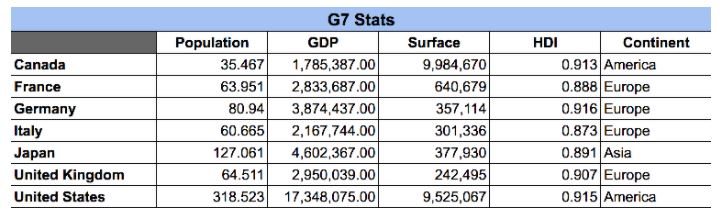

Creating DataFrames manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csv file or the web. But still, you can create a DataFrame by specifying the columns and values:



In [ ]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

(The columns attribute is optional. I'm using it to keep the same order as in the picture above)

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


DataFrames also have indexes. As you can see in the "table" above, pandas has assigned a numeric, autoincremental index automatically to each "row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [ ]:
df.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [ ]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [ ]:
df.size

35

In [ ]:
df.shape

(7, 5)

In [ ]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [ ]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      2
float64    2
object     1
dtype: int64

**Indexing, Selection and Slicing**


Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a Series:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.loc['Canada']

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [ ]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [ ]:
df['Population']

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

Note that the index of the returned Series is the same as the DataFrame one. And its name is the name of the column. If you're working on a notebook and want to see a more DataFrame-like format you can use the to_frame method:

In [ ]:
df['Population'].to_frame()

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


Multiple columns can also be selected similarly to numpy and Series:

In [ ]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In this case, the result is another DataFrame. Slicing works differently, it acts at "row level", and can be counter intuitive:

In [ ]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


Row level selection works better with loc and iloc **which are recommended** over regular "direct slicing" (df[:]).

loc selects rows matching the given index:

In [ ]:
df.loc['Italy']

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [ ]:
df.loc['France': 'Italy']

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe



As a second "argument", you can pass the column(s) you'd like to select:

In [ ]:
df.loc['France': 'Italy', 'Population']

France     63.951
Germany    80.940
Italy      60.665
Name: Population, dtype: float64

In [ ]:
df.loc['France': 'Italy', ['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


iloc works with the (numeric) "position" of the index:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [ ]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [ ]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [ ]:
df.iloc[1:3, [0, 3]]

,Population,HDI
France,63.951,0.888
Germany,80.940,0.916


In [ ]:
df.iloc[1:3, 1:3]

,GDP,Surface Area
France,2833687,640679
Germany,3874437,357114


**RECOMMENDED: Always use loc and iloc to reduce ambiguity, specially with DataFrames with numeric indexes.**

EXERCISE

In [ ]:
certificates_earned = pd.DataFrame({
    'Certificates': [8, 2, 5, 6],
    'Time (in months)': [16, 5, 9, 12]
})

certificates_earned.index = ['Tom', 'Kris', 'Ahmad', 'Beau']

print(certificates_earned.iloc[2])

Certificates        5
Time (in months)    9
Name: Ahmad, dtype: int64


**Conditional selection (boolean arrays)**

We saw conditional selection applied to Series and it'll work in the same way for DataFrames. After all, a DataFrame is a collection of Series:

In [ ]:
df

In [ ]:
df['Population'] > 70

In [ ]:
df.loc[df['Population'] > 70]

The boolean matching is done at Index level, so you can filter by any row, as long as it contains the right indexes. Column selection still works as expected:

In [ ]:
df.loc[df['Population'] > 70, 'Population']

In [ ]:
df.loc[df['Population'] > 70, ['Population', 'GDP']]

**Dropping stuff**

Opposed to the concept of selection, we have "dropping". Instead of pointing out which values you'd like to select you could point which ones you'd like to drop:

In [ ]:
df.drop('Canada')

In [ ]:
df.drop(['Canada', 'Japan'])

In [ ]:
df.drop(columns=['Population', 'HDI'])

In [ ]:
df.drop(['Italy', 'Canada'], axis=0)

In [ ]:
df.drop(['Population', 'HDI'], axis=1)

In [ ]:
df.drop(['Population', 'HDI'], axis=1)

In [ ]:
df.drop(['Population', 'HDI'], axis='columns')

In [ ]:
df.drop(['Canada', 'Germany'], axis='rows')

All these drop methods return a new DataFrame. If you'd like to modify it "in place", you can use the inplace attribute (there's an example below).

**Operations**

In [ ]:
df[['Population', 'GDP']]

In [ ]:
df[['Population', 'GDP']] / 100

**Operations with Series** work at a column level, broadcasting down the rows (which can be counter intuitive).

In [ ]:
crisis = pd.Series([-1_000_000, -0.3], index=['GDP', 'HDI'])
crisis

In [ ]:
df[['GDP', 'HDI']]

In [ ]:
df[['GDP', 'HDI']] + crisis

**Modifying DataFrames**

It's simple and intuitive, You can add columns, or replace values for columns without issues:

** Adding a new column**

In [ ]:
langs = pd.Series(
    ['French', 'German', 'Italian'],
    index=['France', 'Germany', 'Italy'],
    name='Language'
)

In [ ]:
langs

In [ ]:
df['Language'] = langs

In [ ]:
df

**Replacing values per column**

In [ ]:
df['Language'] = 'English'

In [ ]:
df

**Renaming Columns**

In [ ]:
df.rename(
    columns={
        'HDI': 'Human Development Index',
        'Anual Popcorn Consumption': 'APC'
    }, index={
        'United States': 'USA',
        'United Kingdom': 'UK',
        'Argentina': 'AR'
    })

In [ ]:
df.rename(index=str.upper)

In [ ]:
df.rename(index=lambda x: x.lower())

**Dropping columns**

In [ ]:
df.drop(columns='Language', inplace=True)

**Adding values**

In [ ]:

df.append(pd.Series({
    'Population': 3,
    'GDP': 5
}, name='China'))


Append returns a new DataFrame:

In [ ]:
df

You can directly set the new index and values to the DataFrame:

In [ ]:
df.loc['China'] = pd.Series({'Population': 1_400_000_000, 'Continent': 'Asia'})

In [ ]:
df

**More radical index changes**

In [ ]:
df.reset_index()

In [ ]:
df.set_index('Population')

**Creating columns from other columns**

Altering a DataFrame often involves combining different columns into another. For example, in our Countries analysis, we could try to calculate the "GDP per capita", which is just, GDP / Population.

In [ ]:
df[['Population', 'GDP']]

The regular pandas way of expressing that, is just dividing each series:

In [ ]:
df['GDP'] / df['Population']


The result of that operation is just another series that you can add to the original DataFrame:

In [ ]:
df['GDP Per Capita'] = df['GDP'] / df['Population']

In [ ]:
df

**Statistical info**

You've already seen the describe method, which gives you a good "summary" of the DataFrame. Let's explore other methods in more detail:

In [ ]:
df.head

In [ ]:
df.describe()

In [ ]:
population = df['Population']

In [ ]:
population.min(), population.max()

In [ ]:
population.sum()

In [ ]:
population.sum() / len(population)

In [ ]:
population.mean()

In [ ]:
population.std()

In [ ]:
population.median()

In [ ]:
population.describe()

In [ ]:
population.quantile(.25)

In [ ]:
population.quantile([.2, .4, .6, .8, 1])